# Atividade 03
Bianca Bonetti Nunes

### Importando a série temporal de interesse

In [1]:
# Importanto pacotes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

In [2]:
#importando a planilha com dados
cwd = os.getcwd()
path = cwd+'\\Dados\\ES_planilhacompleta.csv'
print(path)
data = pd.read_csv(path,encoding='latin-1')
data.head()

C:\Users\BiaBN\OneDrive\Documentos\ENS410064\Dados\ES_planilhacompleta.csv


C:\Users\BiaBN\AppData\Local\Temp\ipykernel_2076\3387021123.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path,encoding='latin-1')


Ano  Mes  Dia  Hora  Minuto      Estacao Estacao.1 Poluente  Valor  \
0  2023    1    1     0      30  Laranjeiras    ES_001       O3  29.89   
1  2023    1    1     1      30  Laranjeiras    ES_001       O3   26.2   
2  2023    1    1     2      30  Laranjeiras    ES_001       O3  20.27   
3  2023    1    1     3      30  Laranjeiras    ES_001       O3  23.22   
4  2023    1    1     4      30  Laranjeiras    ES_001       O3  21.53   

  Unidade        Tipo    Testacao  
0   ug/m3  Automatica  Referencia  
1   ug/m3  Automatica  Referencia  
2   ug/m3  Automatica  Referencia  
3   ug/m3  Automatica  Referencia  
4   ug/m3  Automatica  Referencia

### Filtrando os dados de uma só estação 

In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
poluentes = data['Poluente'].unique().tolist()
print(poluentes)
colors = ['purple', '#04b1d6', '#ffce05', '#ff9905', '#2e53ef','#ef2ebf', '#0ed309','#0d6a0b','#d88bea','#c91d52','#c91d1d','#dae949']

['O3', 'NO2', 'NO', 'NOX', 'SO2', 'CO', 'MP10', 'MP25', 'CH4', 'NMHC', 'THC', 'PTS']


In [5]:
estacao = 'ES_008'
data_filtrada = data.loc[(data['Estacao.1'] == estacao)]  # Filtrando apenas a estação ES_001
data_filtrada.head()
#transformando a coluna Valor em float
data_filtrada['Valor'] = data_filtrada['Valor'].astype('float')
data_filtrada.dtypes

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_2076\1993167135.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['Valor'] = data_filtrada['Valor'].astype('float')


Ano            int64
Mes            int64
Dia            int64
Hora           int64
Minuto         int64
Estacao       object
Estacao.1     object
Poluente      object
Valor        float64
Unidade       object
Tipo          object
Testacao      object
dtype: object

In [6]:
#checando se existem dados faltantes
print(np.sum(data_filtrada.iloc[:].isna()))

Ano              0
Mes              0
Dia              0
Hora             0
Minuto           0
Estacao          0
Estacao.1        0
Poluente         0
Valor        17981
Unidade          0
Tipo             0
Testacao         0
dtype: int64


c:\users\biabn\onedrive\documentos\ens410064\pyenv\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [7]:
#Criando um datetime
data_filtrada['datetime'] = pd.to_datetime(data_filtrada[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')
data_filtrada = data_filtrada.set_index("datetime")
data_filtrada.head()
data_filtrada['Valor'] = data_filtrada['Valor'].mask(data_filtrada['Valor'] < 0, np.nan)
data_filtrada['Dia_da_Semana'] = data_filtrada.index.day_name(locale='pt_BR').str[:3]


C:\Users\BiaBN\AppData\Local\Temp\ipykernel_2076\1537726693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['datetime'] = pd.to_datetime(data_filtrada[['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']].astype(str).agg('-'.join,axis =1), format = '%Y-%m-%d-%H-%M')


### Fazendo graficos de linha para cada poluente


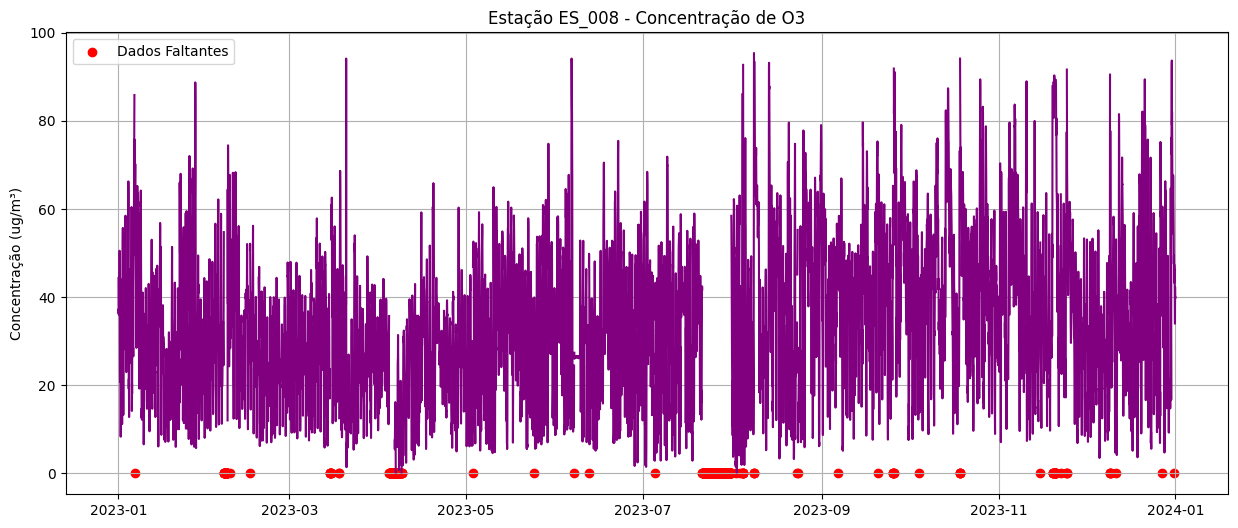

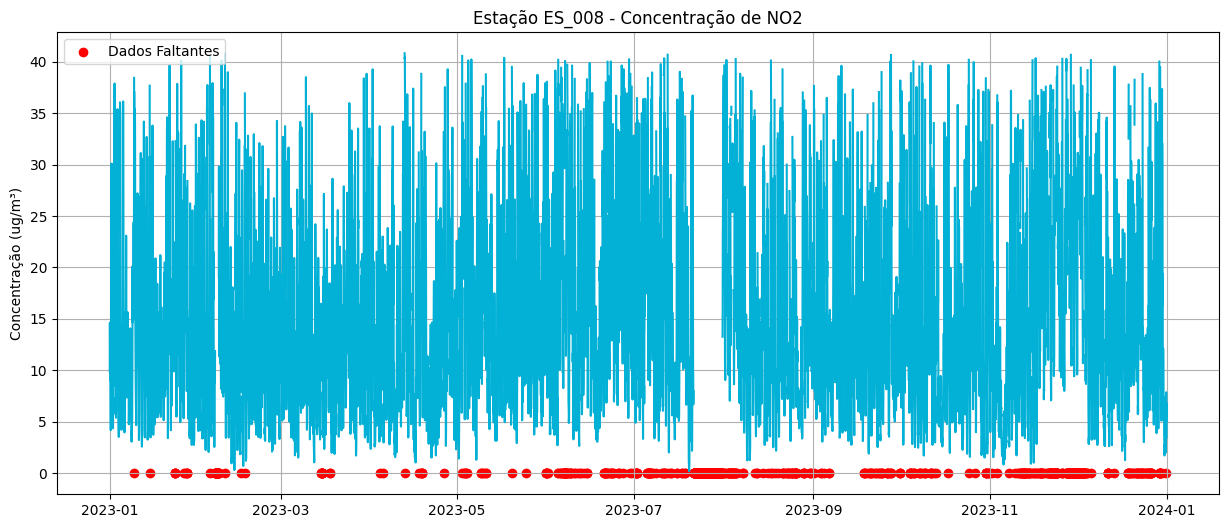

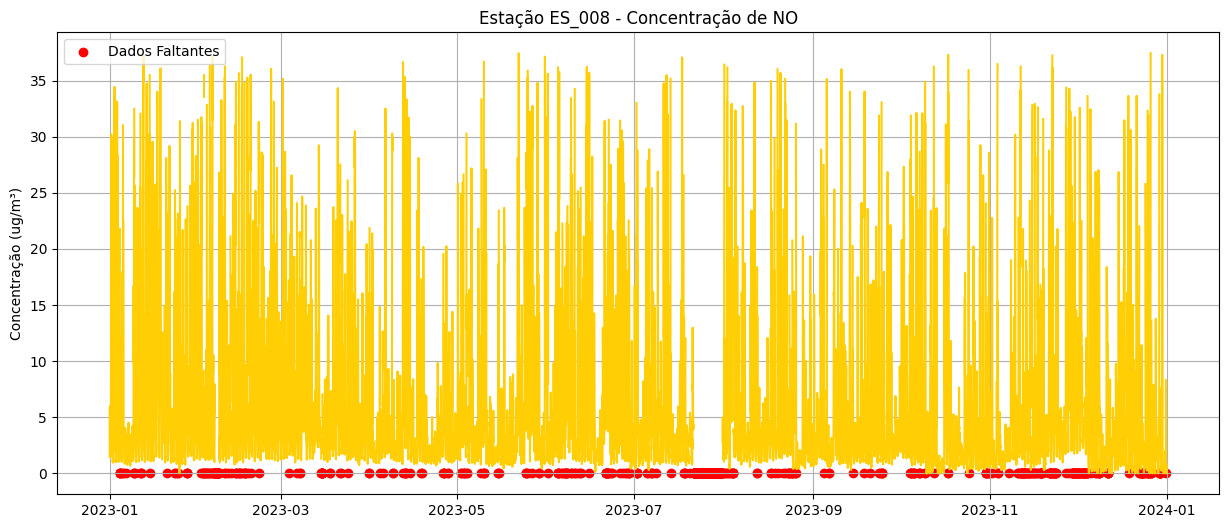

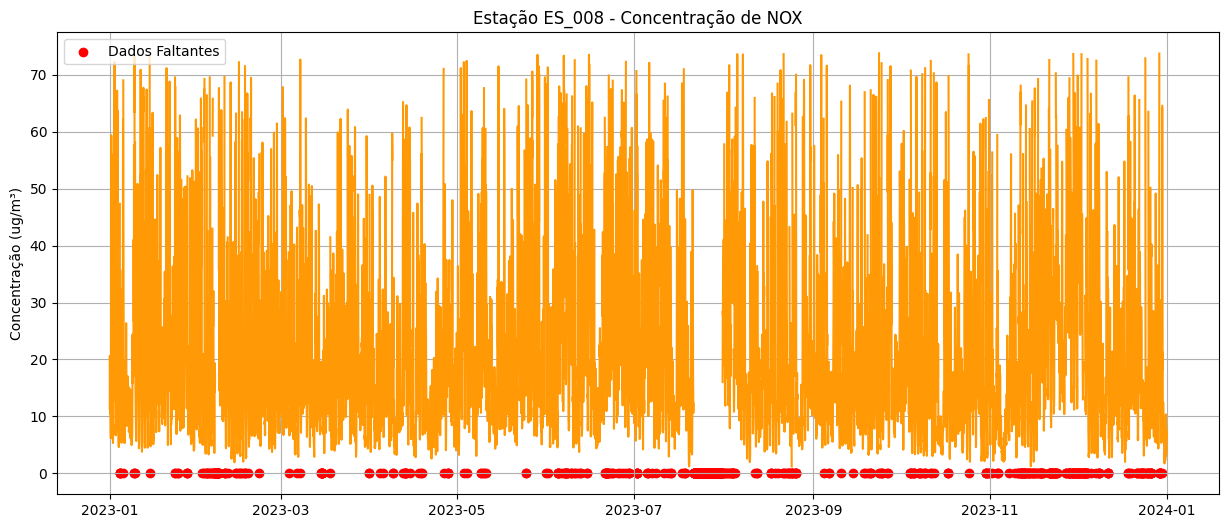

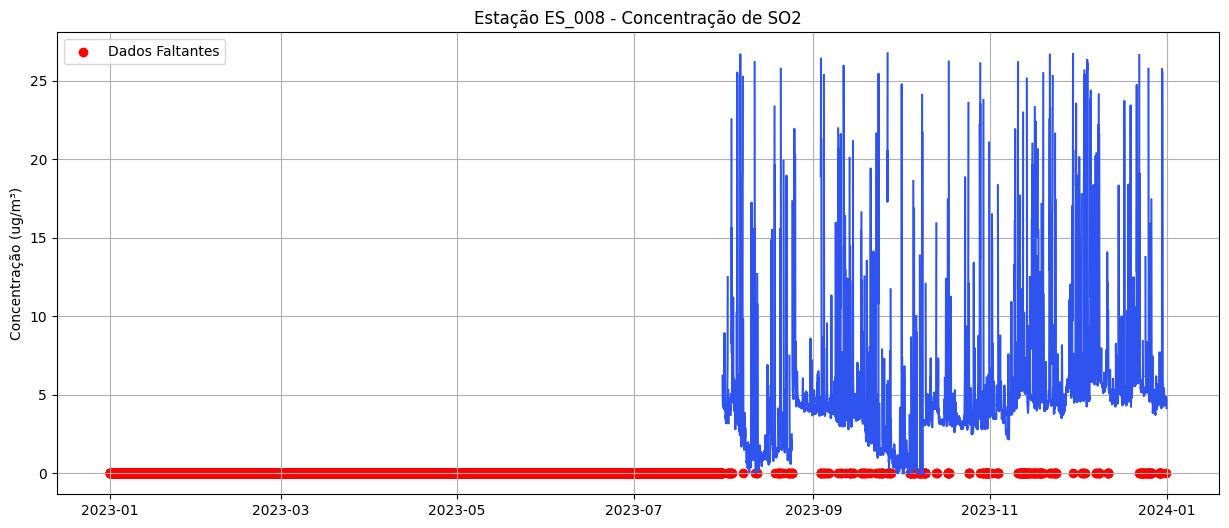

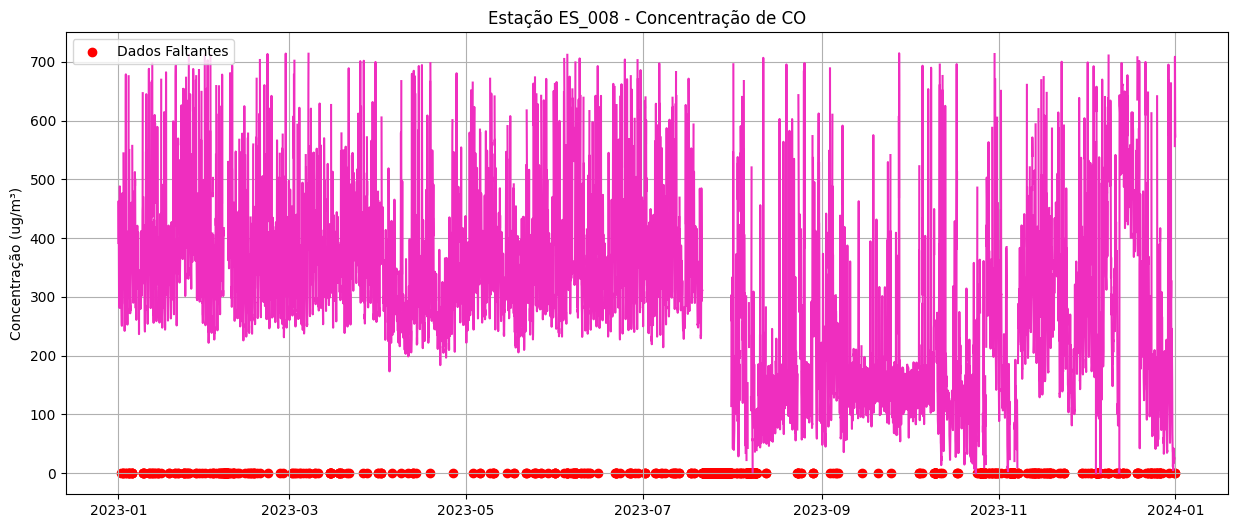

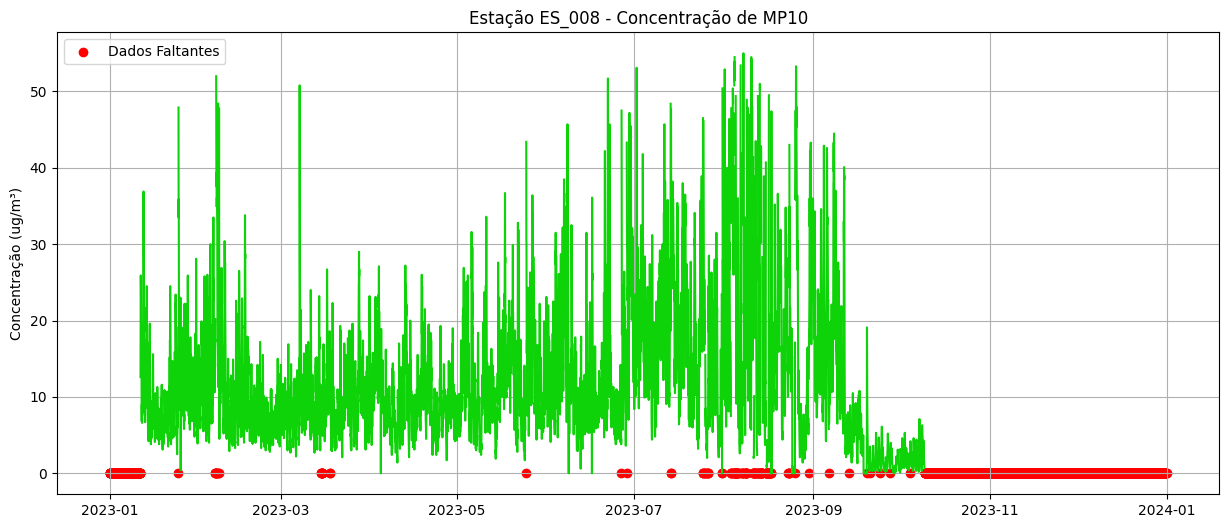

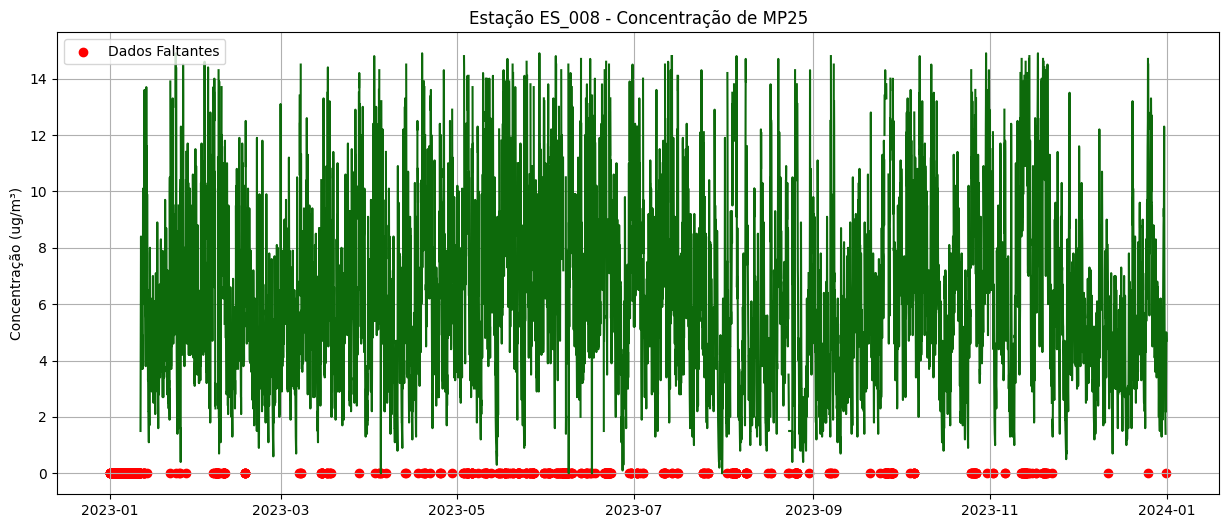

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

In [8]:
for ii,polu in enumerate(poluentes):
    plt.figure(figsize=(15, 6))
    df_poluente = data_filtrada.loc[data_filtrada['Poluente'] == polu].copy()
    if df_poluente['Valor'].mean()>0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente['Valor'] = np.where(
        (df_poluente['Valor'] >= mediana-2*desvio_padrao) & (df_poluente['Valor'] <= mediana+2*desvio_padrao),
        df_poluente['Valor'],
        np.nan)        
        plt.plot(df_poluente.index,df_poluente['Valor'],color = colors[ii])
        plt.scatter(df_poluente.index[df_poluente.iloc[:,8].isna()],np.zeros(np.sum(df_poluente.iloc[:,8].isna())),color='red', label = 'Dados Faltantes')
        #if polu in limites:
        #    label_limite = 'Limite de '+polu
        #    plt.axhline(y= limites[polu], color= 'red', linestyle='--', label=label_limite)
        plt.grid(True)
        title = 'Estação '+estacao+' - Concentração de '+polu
        plt.title(title)
        plt.ylabel('Concentração (ug/m³)')
        plt.legend(loc='upper left')
        #salvando figuras
        os.makedirs(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao,exist_ok = True)
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()


### Fazendo Gráficos das Médias Diárias

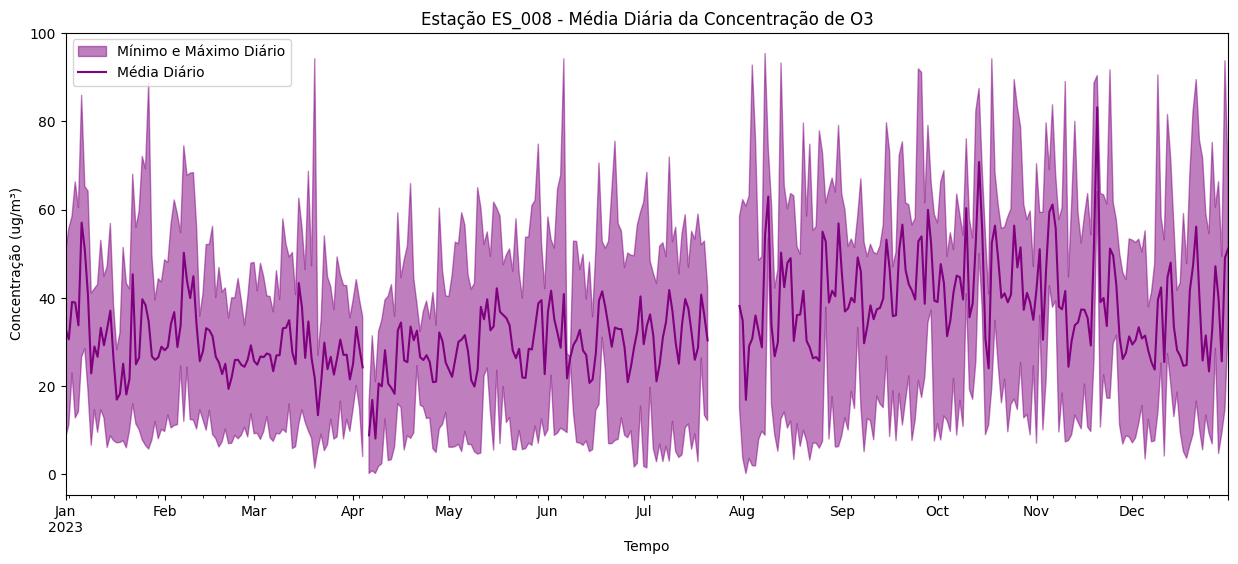

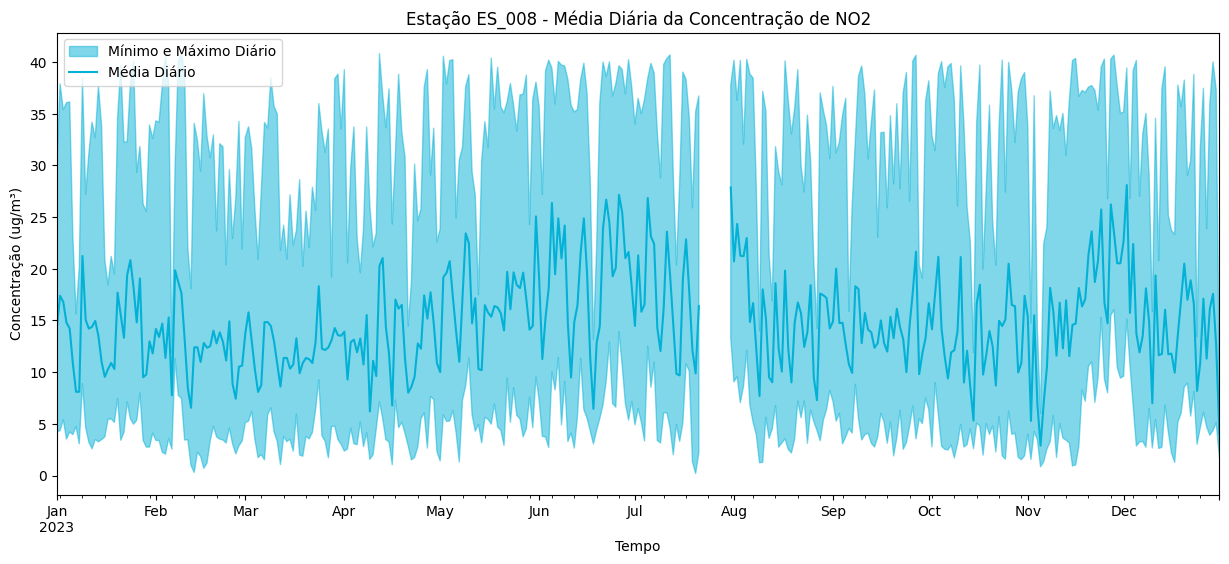

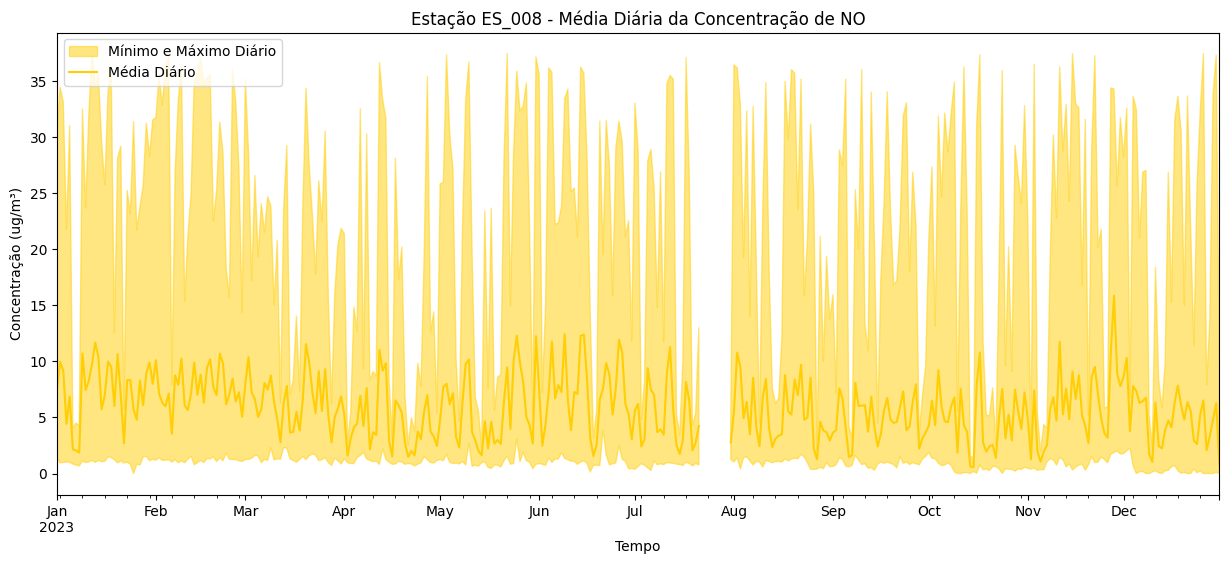

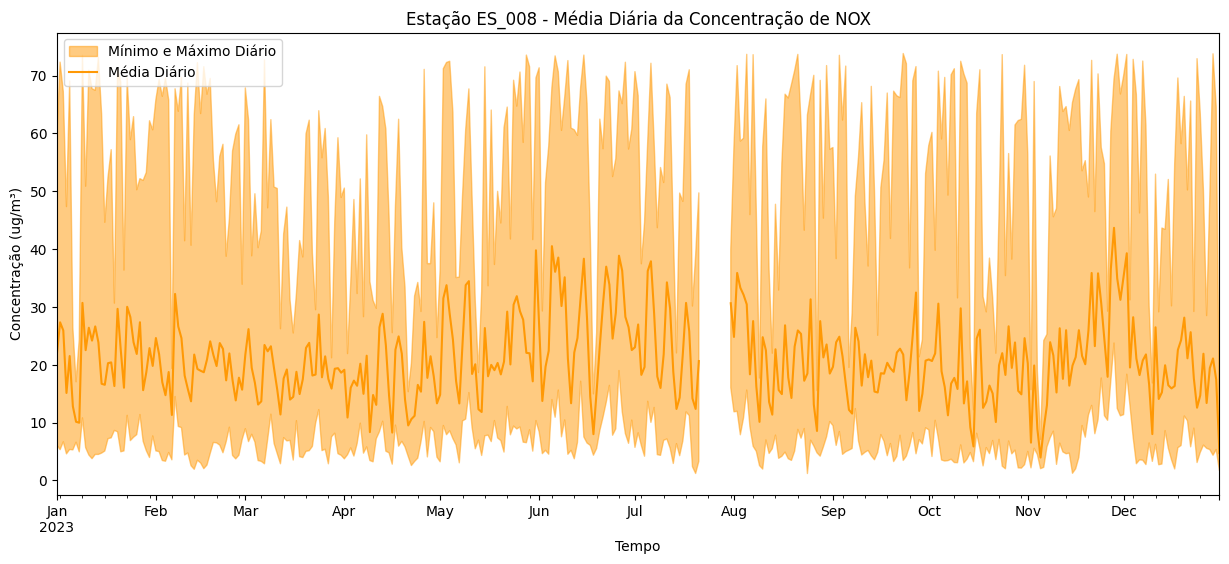

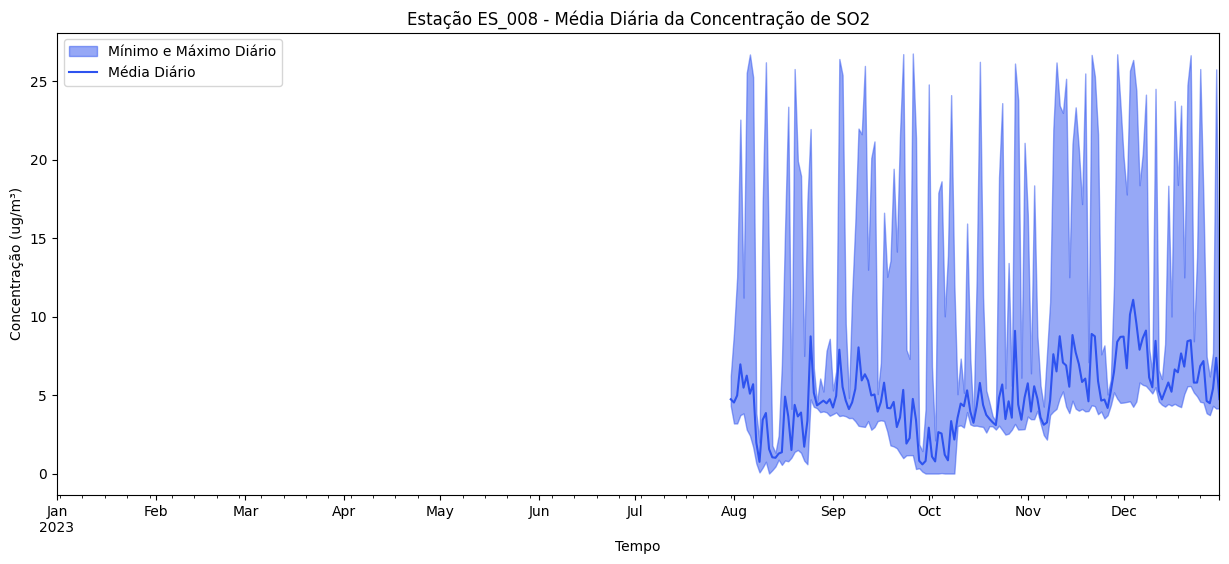

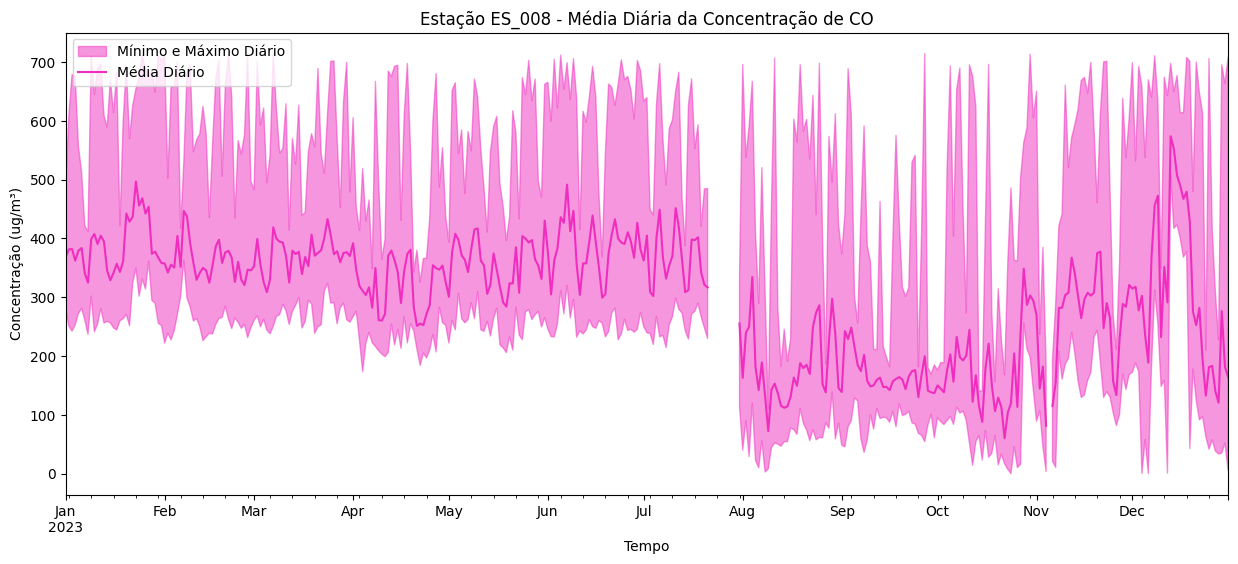

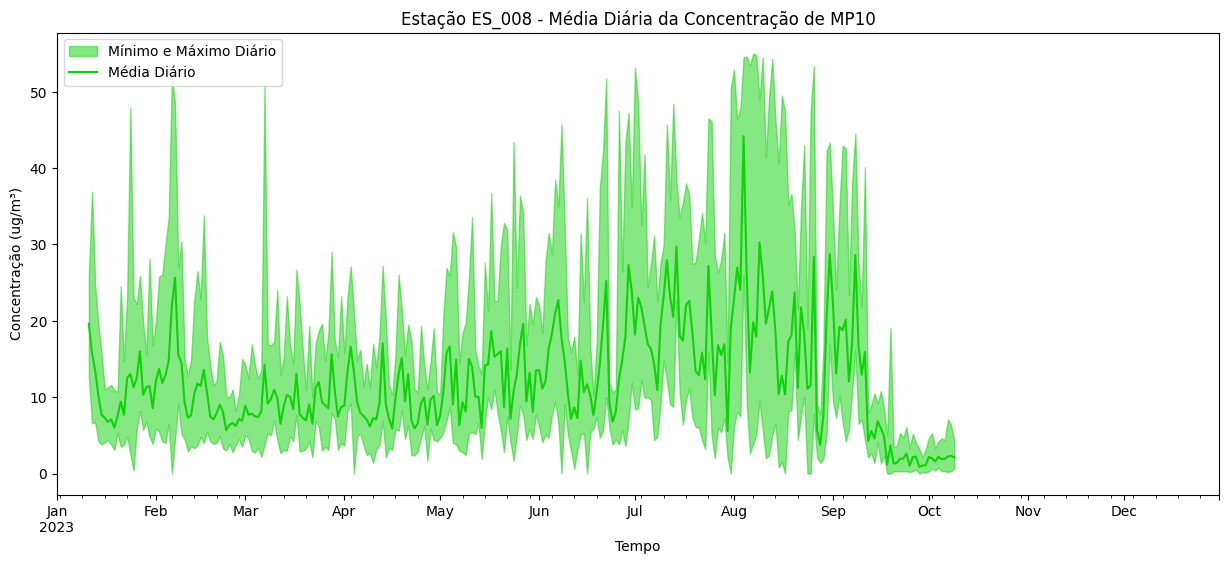

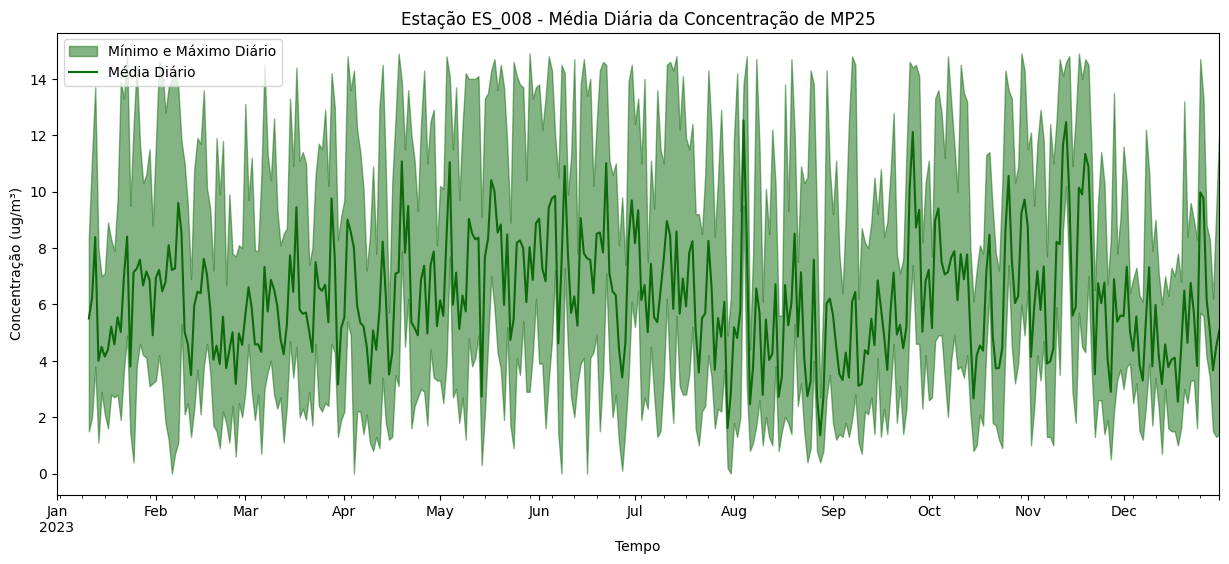

In [9]:
for jj, polu in enumerate(poluentes):   
    # Calcula a média, mínima e máxima diária
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    if df_poluente['Valor'].mean()>0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente.loc[:, 'Valor'] = np.where(
        (df_poluente['Valor'] >= mediana-2*desvio_padrao) & (df_poluente['Valor'] <= mediana+2*desvio_padrao),
        df_poluente['Valor'],
        np.nan)
        
        media_diaria_poluente = df_poluente['Valor'].resample('D').mean()  #Resample('D'),reamostrar os dados em uma base diária e calculua a media
        min_diaria_poluente = df_poluente['Valor'].resample('D').min()
        max_diaria_poluente = df_poluente['Valor'].resample('D').max()
        
        plt.figure(figsize=(15, 6))
        
        # Área sombreada entre os valores mínimo e máximo
        plt.fill_between(min_diaria_poluente.index, min_diaria_poluente, max_diaria_poluente, color=colors[jj], alpha=0.5, label='Mínimo e Máximo Diário')
        
        # Plota a média diária
        media_diaria_poluente.plot(color=colors[jj], legend=True, label='Média Diário')
        
        plt.xlabel('Tempo')
        plt.ylabel('Concentração (ug/m³)')
        title = 'Estação '+estacao+' - Média Diária da Concentração de '+polu
        plt.title(title)
        plt.legend(loc='upper left')
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

### Plotando Gráficos Boxsplot

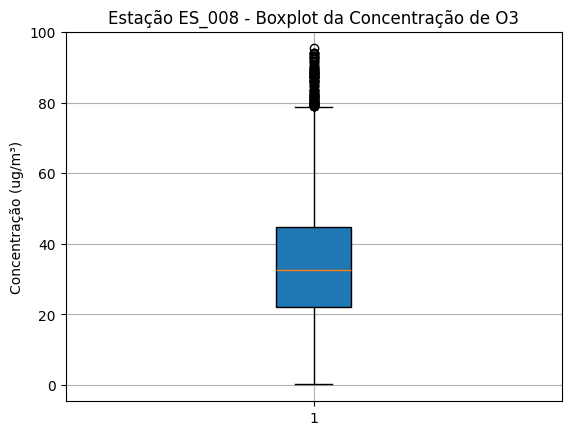

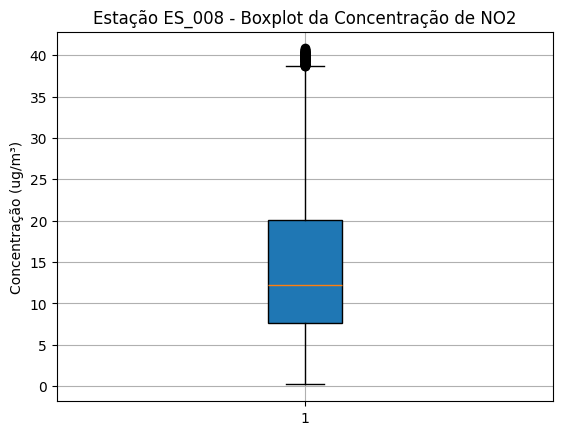

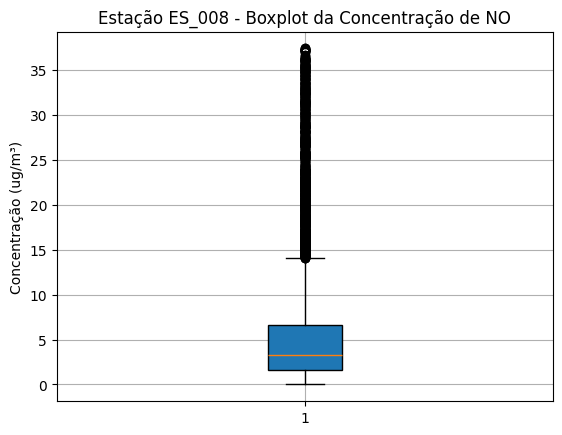

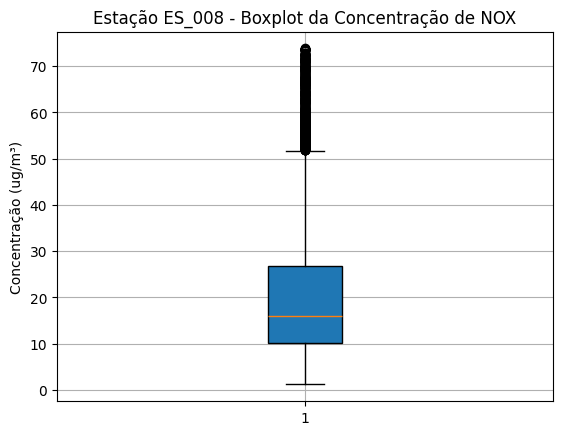

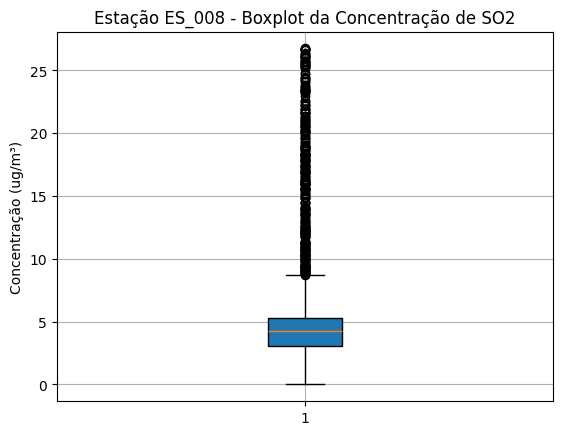

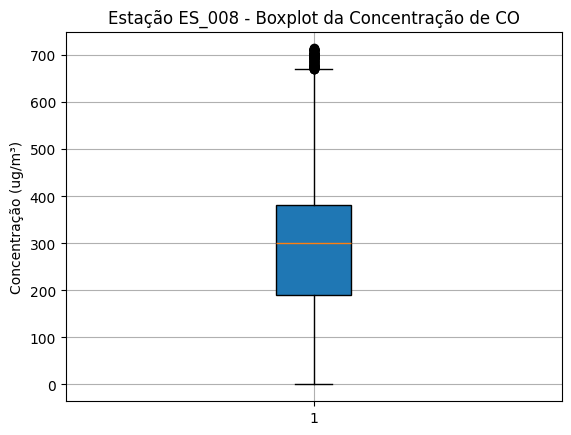

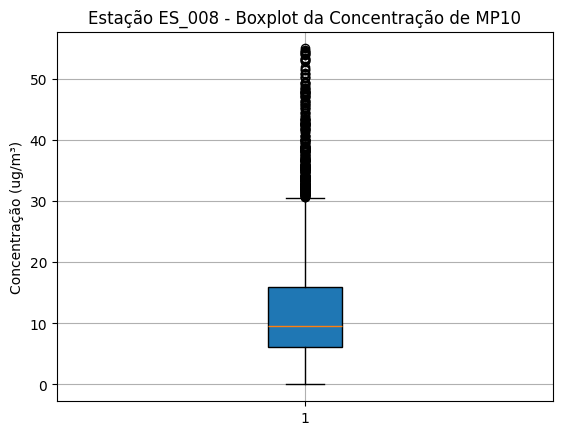

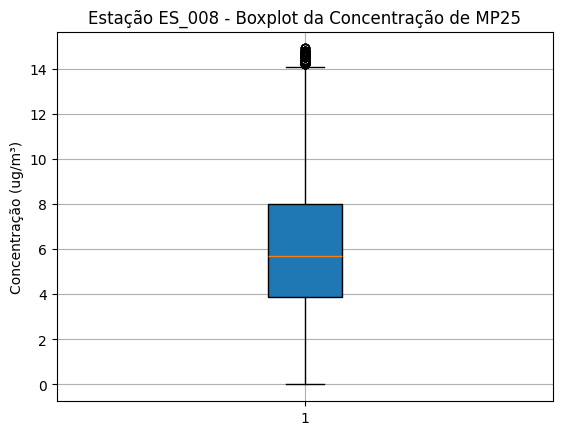

In [10]:
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])
    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        plt.boxplot(df_poluente['Valor'], vert=True, patch_artist=True)
        title = 'Estação '+estacao+' - Boxplot da Concentração de '+polu
        plt.title(title)
        plt.ylabel('Concentração (ug/m³)')
        plt.grid(True)
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

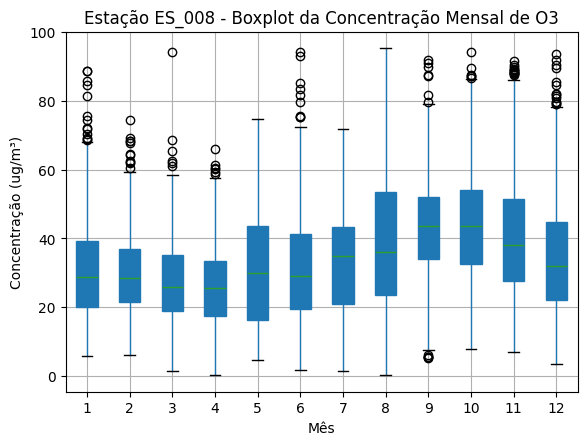

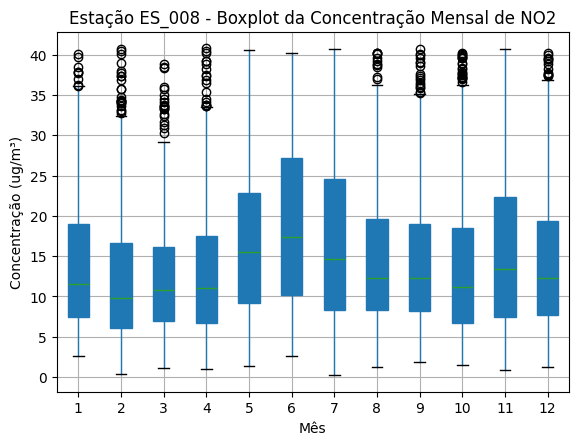

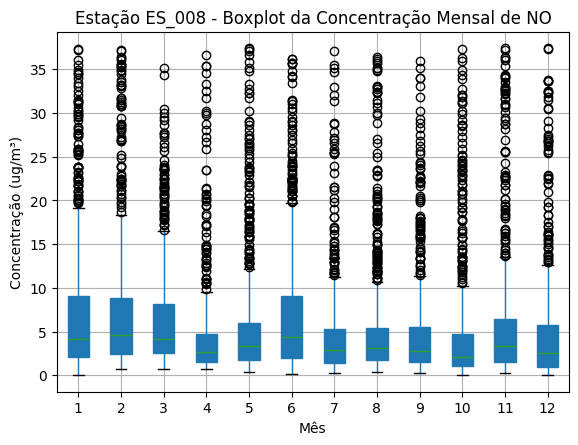

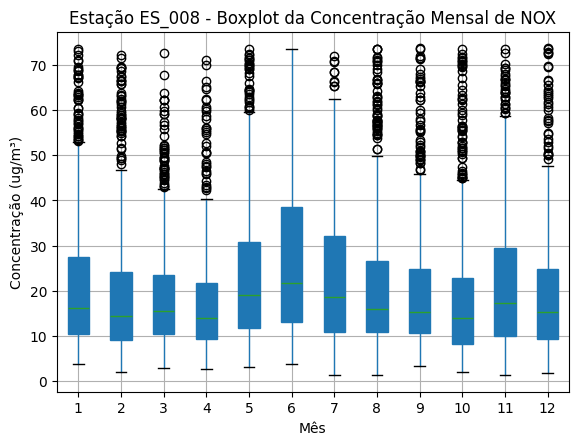

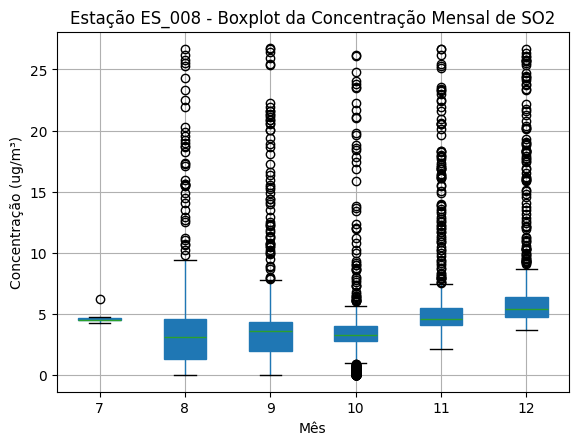

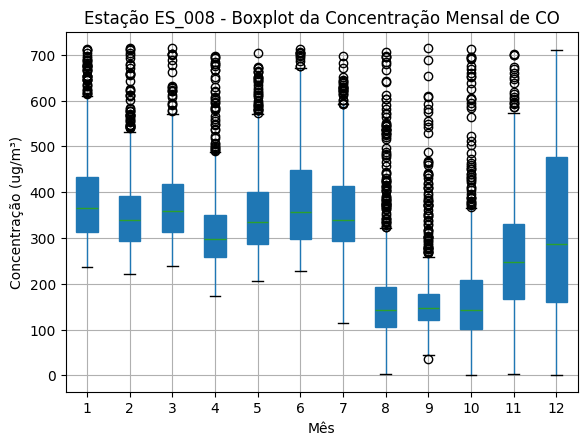

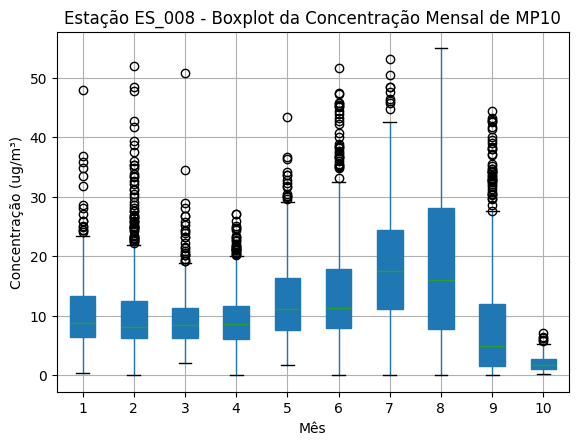

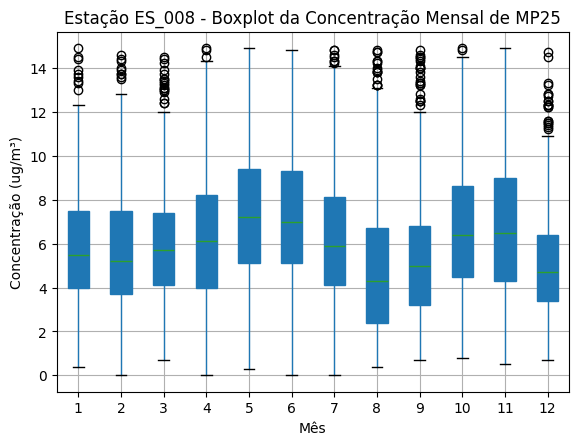

In [11]:
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Mes', patch_artist=True)
        
        # Ajustando o título e os rótulos
        title = 'Estação '+estacao+' - Boxplot da Concentração Mensal de '+polu
        plt.title(title)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Mês")
        plt.ylabel("Concentração (ug/m³)")
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')        
        plt.show()

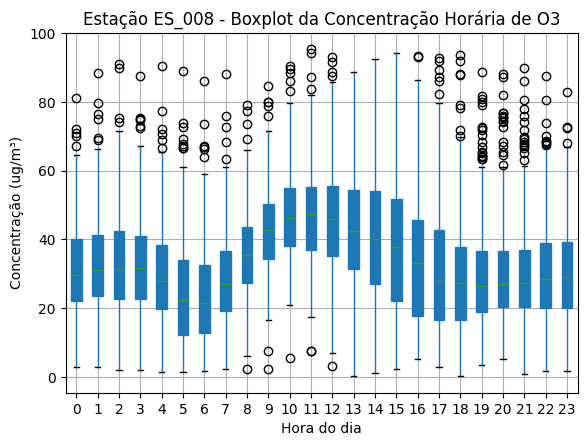

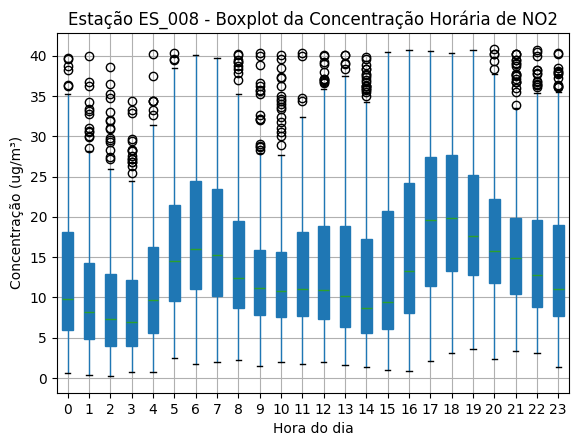

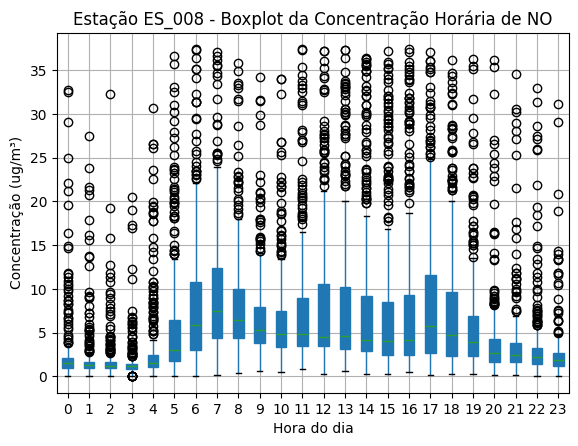

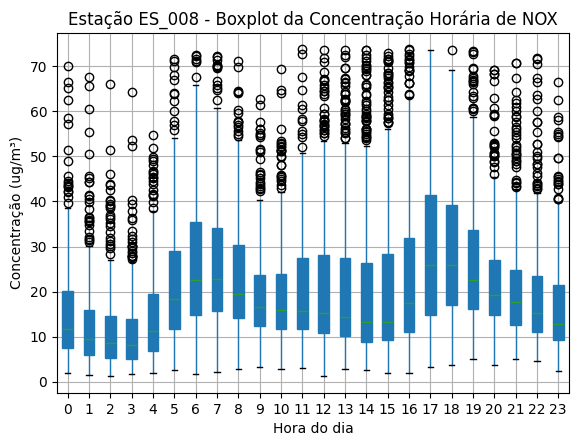

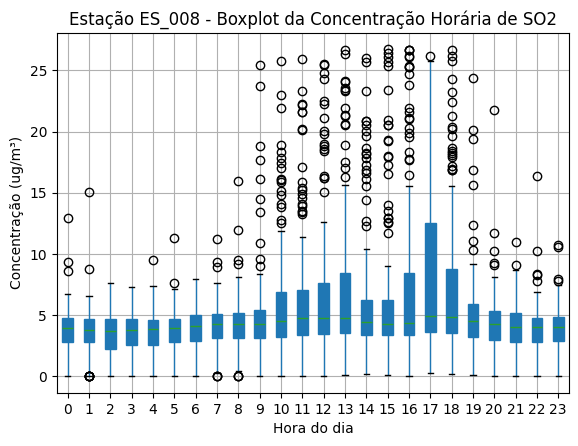

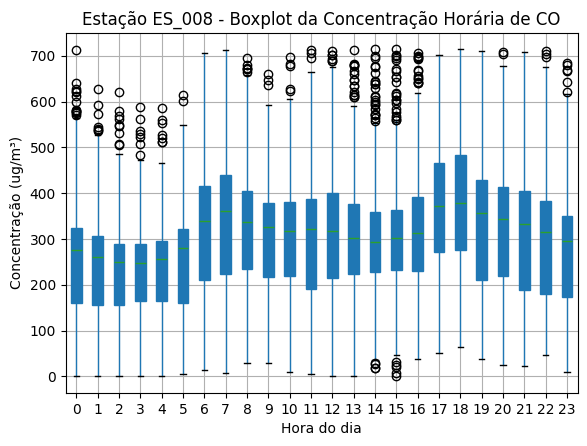

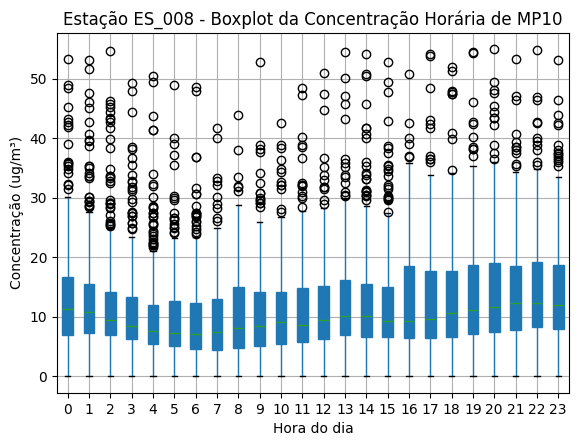

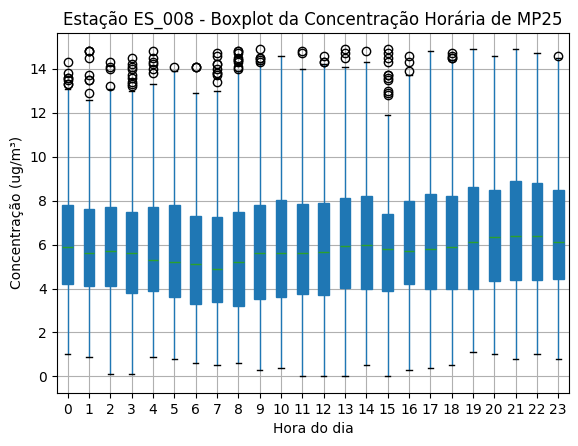

In [12]:
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Hora', patch_artist=True)
        
        # Ajustando o título e os rótulos
        title = 'Estação '+estacao+' - Boxplot da Concentração Horária de '+polu
        plt.title(title)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Hora do dia")
        plt.ylabel("Concentração (ug/m³)")
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

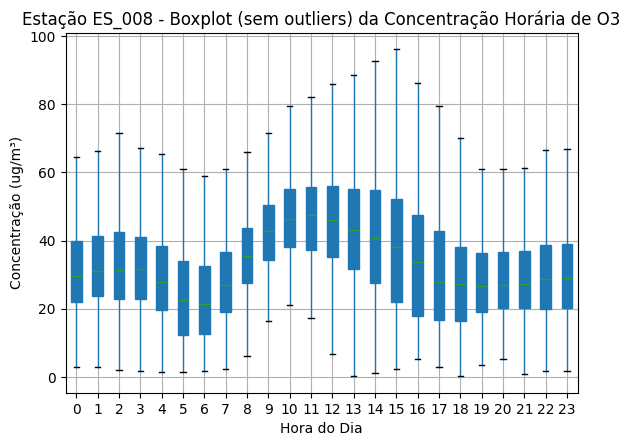

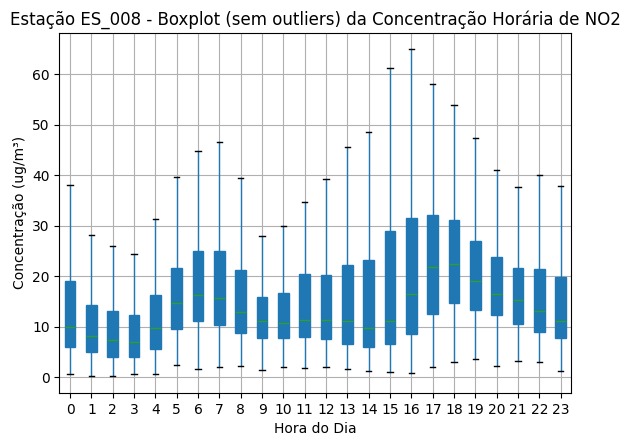

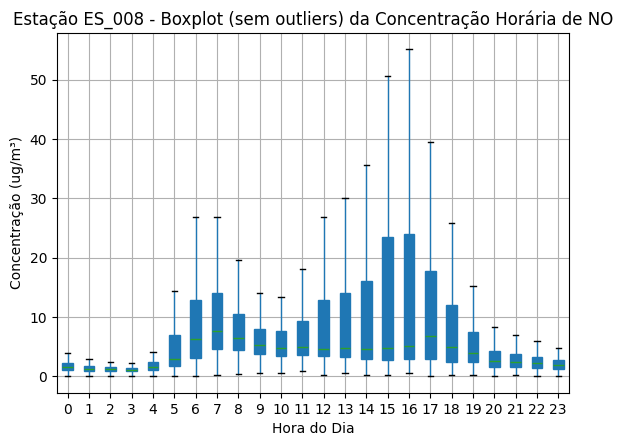

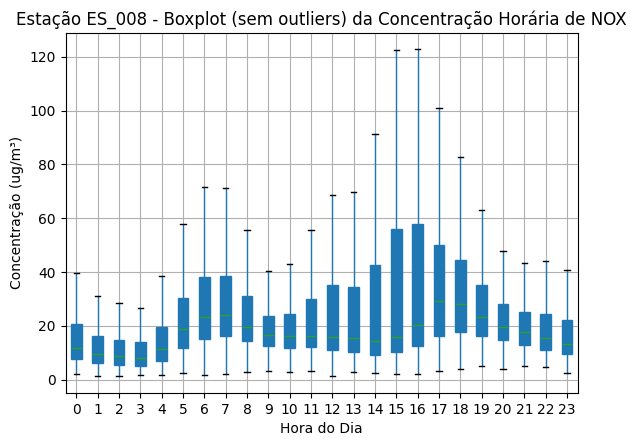

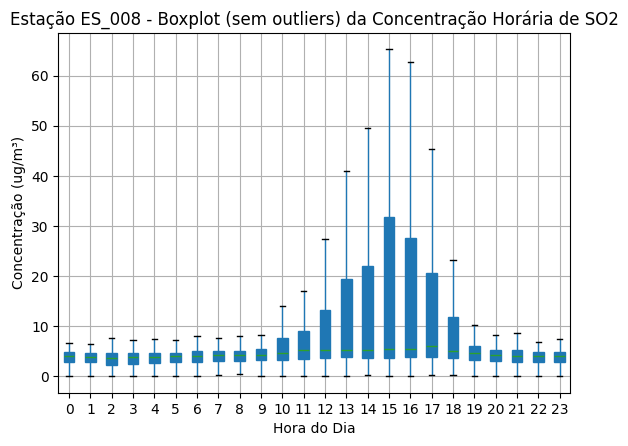

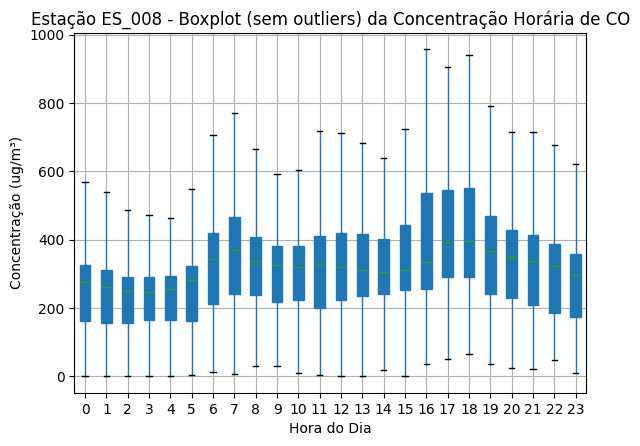

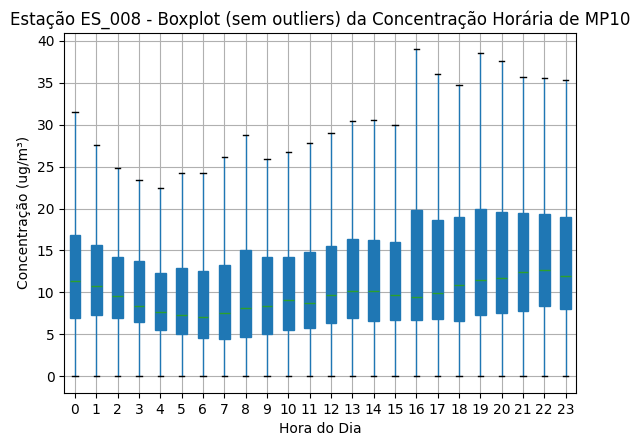

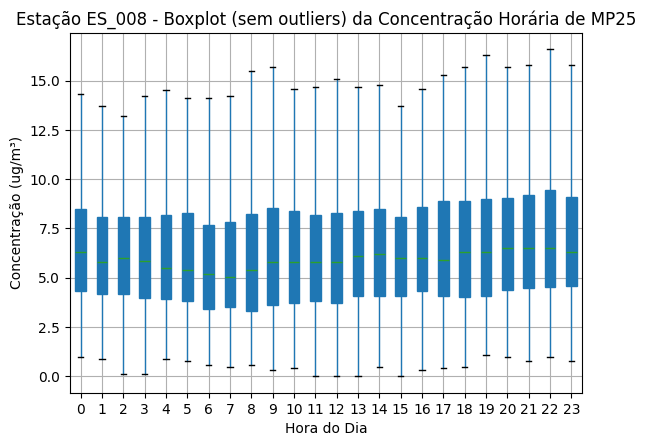

In [13]:
#tirando outliers
for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)]
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Hora', patch_artist=True,showfliers=False)
        
        # Ajustando o título e os rótulos
        title = 'Estação '+estacao+' - Boxplot (sem outliers) da Concentração Horária de '+polu
        plt.title(title)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("Hora do Dia")
        plt.ylabel("Concentração (ug/m³)")
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

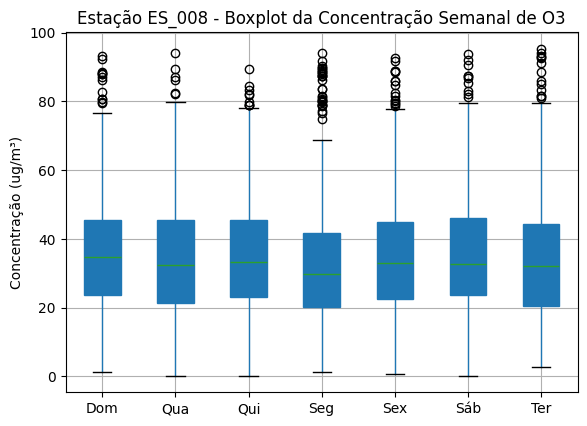

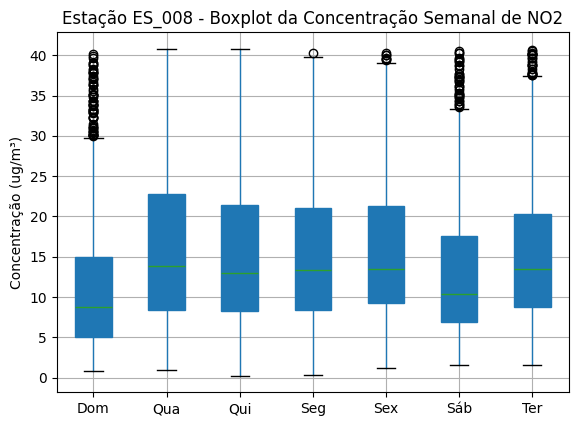

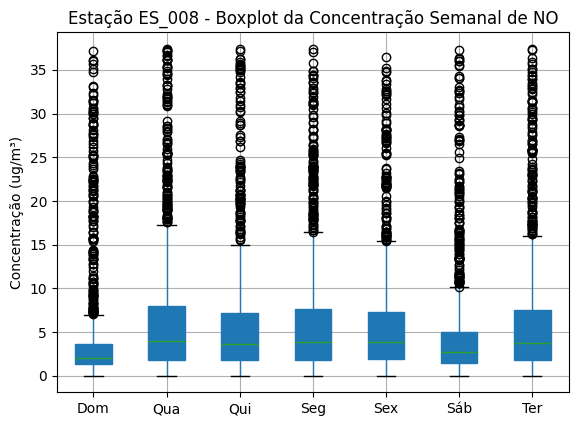

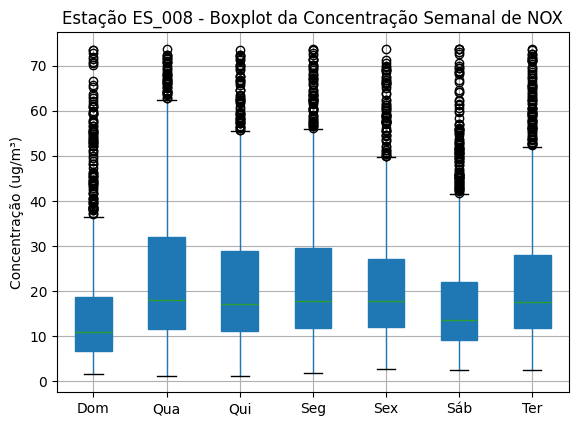

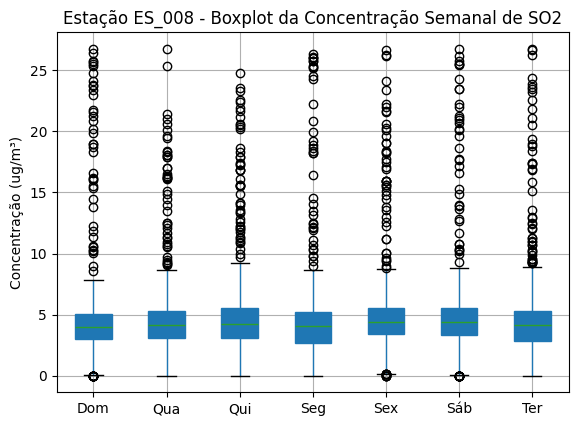

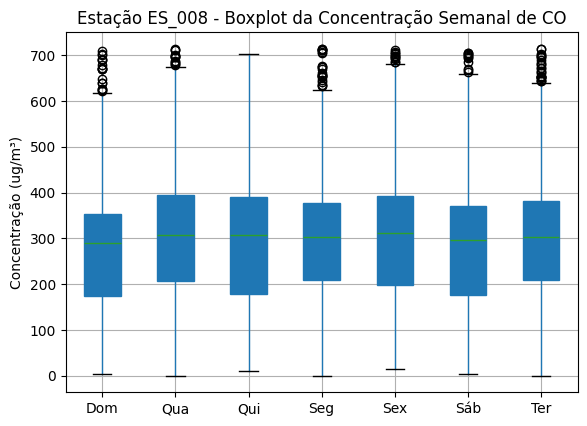

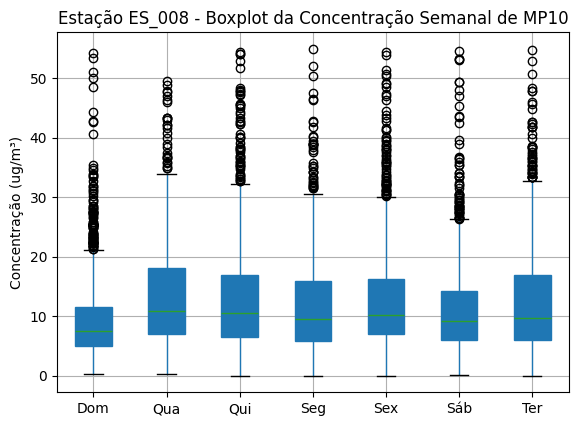

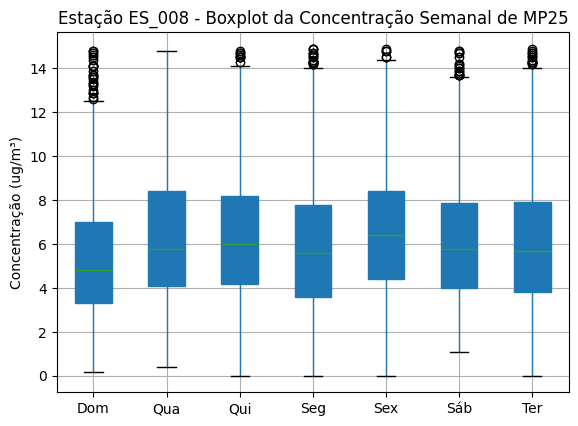

In [14]:

for polu in poluentes:
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)].copy()
    
    # Removendo valores ausentes da coluna 'Valor'
    df_poluente = df_poluente.dropna(subset=['Valor'])

    if len(df_poluente) > 0:
        mediana = df_poluente['Valor'].median()
        desvio_padrao = df_poluente['Valor'].std()
        # Filtrar para manter apenas os valores que são menores ou iguais a 2 vezes a mediana
        df_poluente = df_poluente[(df_poluente['Valor'] >= mediana-2*desvio_padrao)&(df_poluente['Valor'] <= mediana+2*desvio_padrao)]
        
        # Criando um boxplot por mês
        df_poluente.boxplot(column='Valor', by='Dia_da_Semana', patch_artist=True)
        
        # Ajustando o título e os rótulos
        title = 'Estação '+estacao+' - Boxplot da Concentração Semanal de '+polu
        plt.title(title)
        plt.suptitle("")  # Remove o título automático gerado pelo `by`
        plt.xlabel("")
        plt.ylabel("Concentração (ug/m³)")
        #salvando figuras
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()

### Estatísticas Univariadas

In [27]:
for ii,polu in enumerate(poluentes):
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)].copy()
    if df_poluente['Valor'].mean()>0:
        print(f'\nEstatísticas Descritivas para o Poluente {polu} (coluna "Valor"):')
        statistics = df_poluente['Valor'].describe()
        print(statistics)
        title = 'Estação '+estacao+' - Estatisticas do '+polu
        statistics.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')
        print("\nEstatísticas descritivas por mês:")
        statistics_mes = df_poluente.groupby('Mes')['Valor'].describe()
        print(statistics_mes)
        title = 'Estação '+estacao+' - Estatisticas por Mês do '+polu
        statistics_mes.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')
        print("\nEstatísticas descritivas por hora:")
        statistics_hora = df_poluente.groupby('Hora')['Valor'].describe()
        print(statistics_hora)
        title = 'Estação '+estacao+' - Estatisticas por Hora do '+polu
        statistics_hora.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')
        print("\nEstatísticas descritivas por dia da semana:")
        statistics_semana = df_poluente.groupby('Dia_da_Semana')['Valor'].describe()
        print(statistics_semana)
        title = 'Estação '+estacao+' - Estatisticas por Dia da Semana do '+polu
        statistics_semana.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.csv')



Estatísticas Descritivas para o Poluente O3 (coluna "Valor"):
count    8392.000000
mean       34.774990
std        31.328771
min         0.170000
25%        22.265000
50%        32.840000
75%        45.070000
max      2424.420000
Name: Valor, dtype: float64

Estatísticas descritivas por mês:
     count       mean        std   min      25%     50%      75%      max
Mes                                                                      
1    744.0  31.600699  15.587288  5.72  20.0700  28.855  39.3550    98.68
2    640.0  29.798484  12.167559  6.18  21.4125  28.380  36.8150    74.46
3    735.0  30.455537  89.254734  1.38  18.8450  25.850  35.3250  2424.42
4    650.0  25.770631  12.191099  0.20  17.3150  25.465  33.5750   129.82
5    742.0  30.249717  15.865209  4.57  16.3775  30.020  43.5800    74.82
6    718.0  31.219540  15.813946  1.66  19.4850  29.165  41.3225    94.16
7    503.0  32.589622  15.393714  1.45  20.8200  34.950  43.4500    71.89
8    740.0  38.632581  20.911077  0.17  

### Teste de Mann-Kendall

In [16]:
dados = []

for polu in poluentes:
    # Filtrando os dados para o poluente atual
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)].copy()
    if df_poluente['Valor'].mean() > 0:
        mensal = df_poluente['Valor'].resample('ME').mean()
        
        # Executando o teste de Mann-Kendall
        resultado = mk.original_test(mensal)
        
        # Adicionando o resultado como dicionário na lista 'dados'
        dados.append({
            'poluente': polu,
            'trend': resultado.trend,
            'h': resultado.h,
            'p': resultado.p,
            'z': resultado.z,
            'Tau': resultado.Tau,
            's': resultado.s,
            'var_s': resultado.var_s,
            'slope': resultado.slope,
            'intercept': resultado.intercept
        })

# Convertendo a lista de dicionários para DataFrame
df_resultados = pd.DataFrame(dados)

# Salvando o DataFrame em um arquivo CSV
df_resultados.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+estacao+'_resultado_mann_kendall_mensal.csv')


In [17]:
dados = []

for polu in poluentes:
    # Filtrando os dados para o poluente atual
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)].copy()
    if df_poluente['Valor'].mean() > 0:
        diario = df_poluente['Valor'].resample('D').mean()
        
        # Executando o teste de Mann-Kendall
        resultado = mk.original_test(diario)
        
        # Adicionando o resultado como dicionário na lista 'dados'
        dados.append({
            'poluente': polu,
            'trend': resultado.trend,
            'h': resultado.h,
            'p': resultado.p,
            'z': resultado.z,
            'Tau': resultado.Tau,
            's': resultado.s,
            'var_s': resultado.var_s,
            'slope': resultado.slope,
            'intercept': resultado.intercept
        })

# Convertendo a lista de dicionários para DataFrame
df_resultados_diario = pd.DataFrame(dados)

# Salvando o DataFrame em um arquivo CSV
df_resultados_diario.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+estacao+'_resultado_mann_kendall_diario.csv')


In [18]:
dados = []

for polu in poluentes:
    # Filtrando os dados para o poluente atual
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu)].copy()
    if df_poluente['Valor'].mean() > 0:
        horario = df_poluente['Valor'].resample('h').mean()
        
        # Executando o teste de Mann-Kendall
        resultado = mk.original_test(horario)
        
        # Adicionando o resultado como dicionário na lista 'dados'
        dados.append({
            'poluente': polu,
            'trend': resultado.trend,
            'h': resultado.h,
            'p': resultado.p,
            'z': resultado.z,
            'Tau': resultado.Tau,
            's': resultado.s,
            'var_s': resultado.var_s,
            'slope': resultado.slope,
            'intercept': resultado.intercept
        })

# Convertendo a lista de dicionários para DataFrame
df_resultados_horario = pd.DataFrame(dados)

# Salvando o DataFrame em um arquivo CSV
df_resultados_horario.to_csv(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+estacao+'_resultado_mann_kendall_horario.csv')


In [20]:
df_resultados_diario

poluente       trend      h             p         z       Tau        s  \
0       O3  increasing   True  0.000000e+00  8.307023  0.295393  18561.0   
1      NO2  increasing   True  6.547802e-08  5.403157  0.191866  12124.0   
2       NO    no trend  False  2.914439e-01 -1.054959 -0.037474  -2368.0   
3      NOX  increasing   True  6.050466e-03  2.745034  0.097484   6160.0   
4      SO2  increasing   True  1.712720e-05  4.299386  0.233681   2753.0   
5       CO  decreasing   True  3.108624e-15 -7.884510 -0.280369 -17617.0   
6     MP10  increasing   True  3.631797e-03  2.908489  0.118353   4362.0   
7     MP25    no trend  False  7.880914e-02 -1.757638 -0.062513  -3928.0   

          var_s     slope   intercept  
0  4.991892e+06  0.040287   25.755959  
1  5.034137e+06  0.015542   12.447435  
2  5.034137e+06 -0.002547    7.467456  
3  5.034137e+06  0.012985   20.404253  
4  4.097170e+05  0.030081   -2.794841  
5  4.991892e+06 -0.514104  444.784242  
6  2.248212e+06  0.020506    8.180980  
7  4.991867e+06 -0.002199    6.624863

### Verificando Sazonalidade

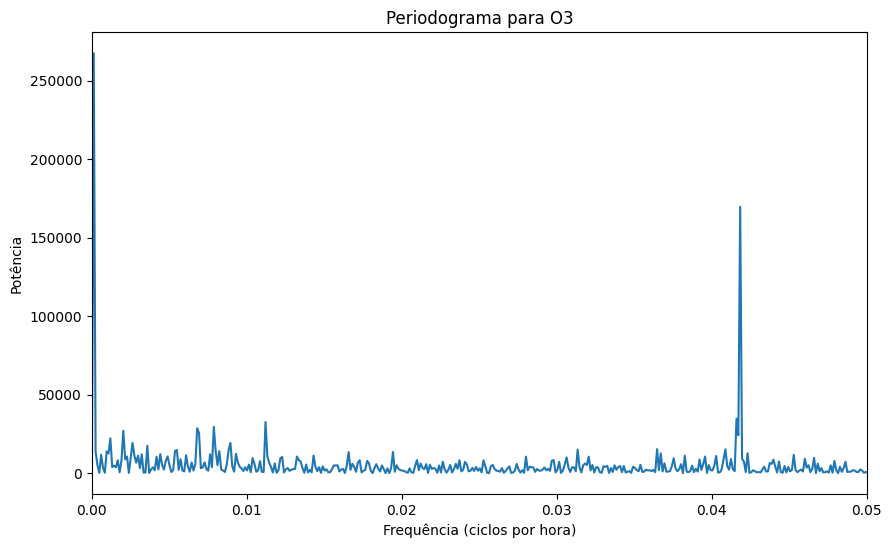

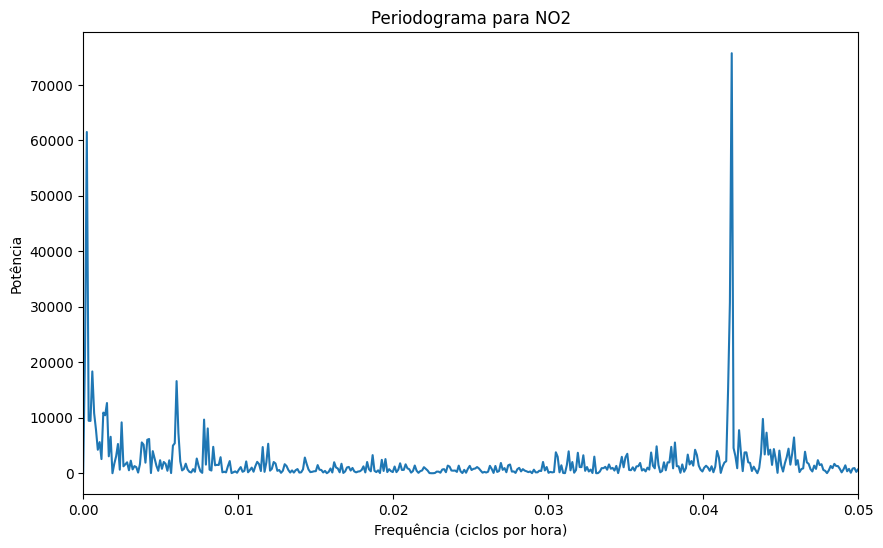

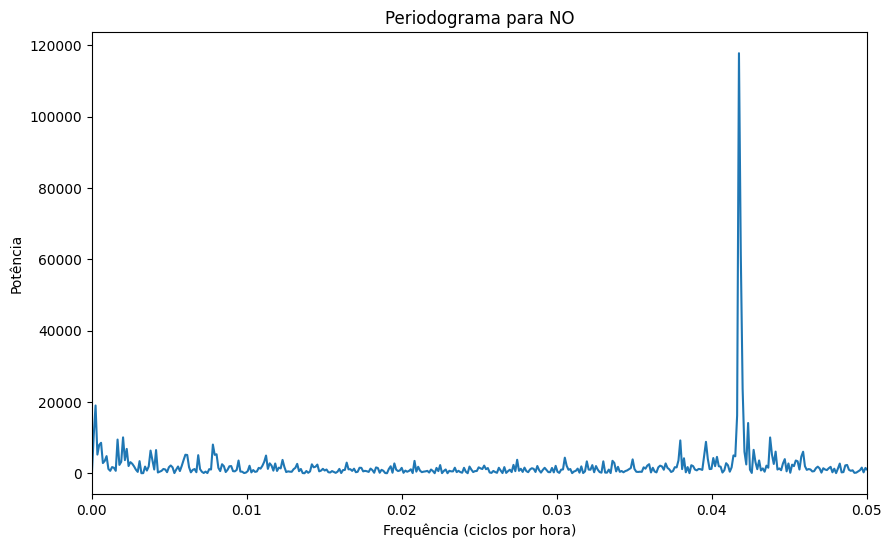

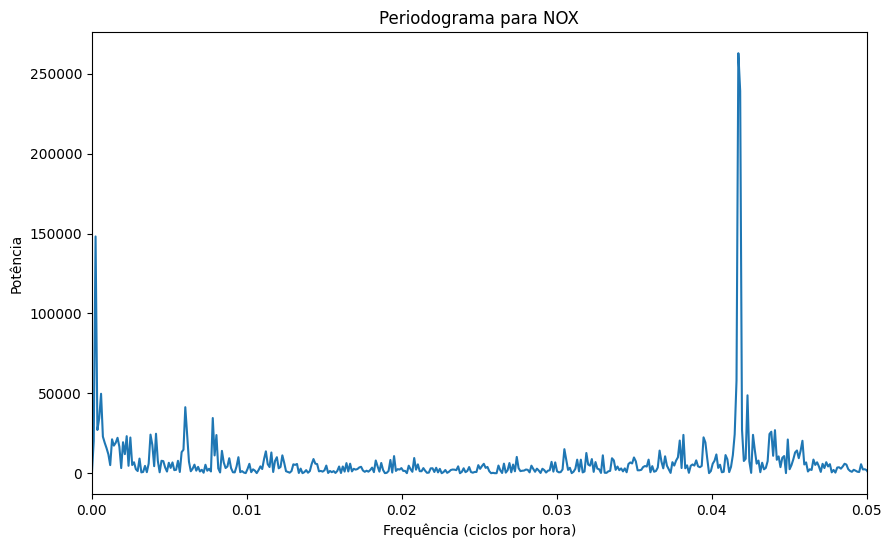

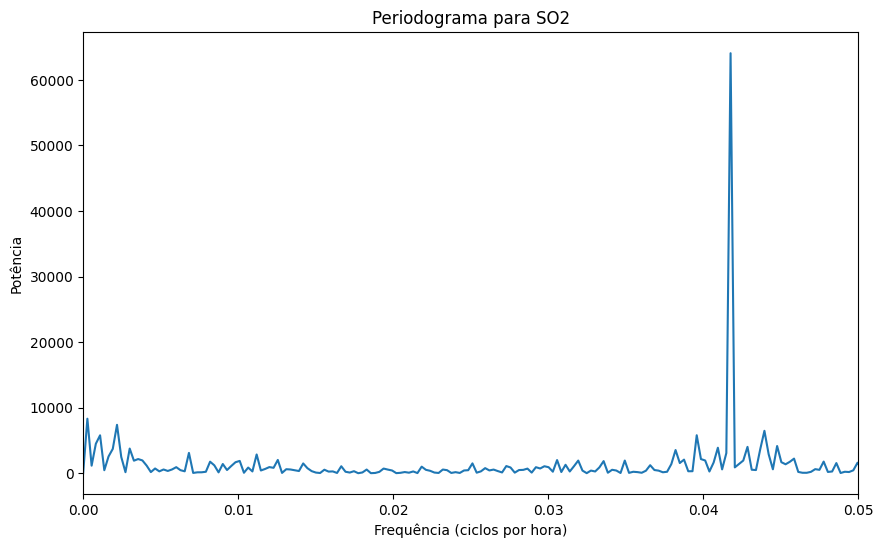

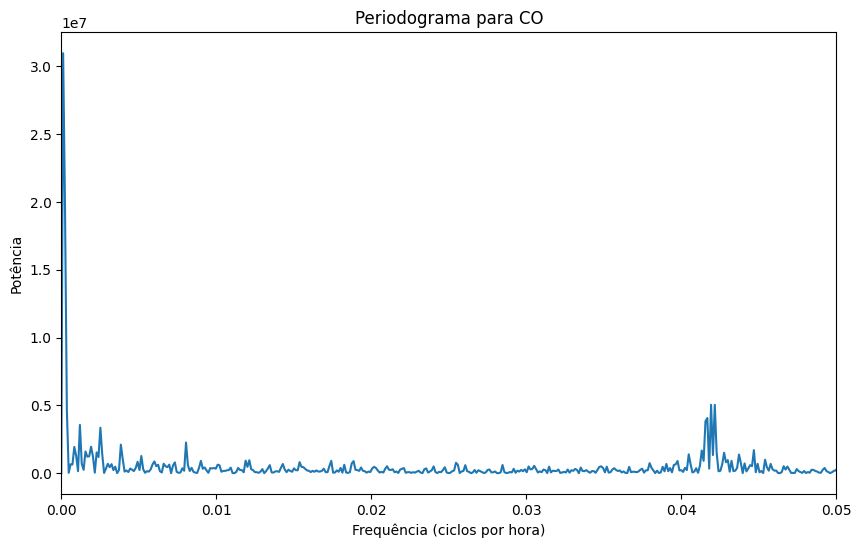

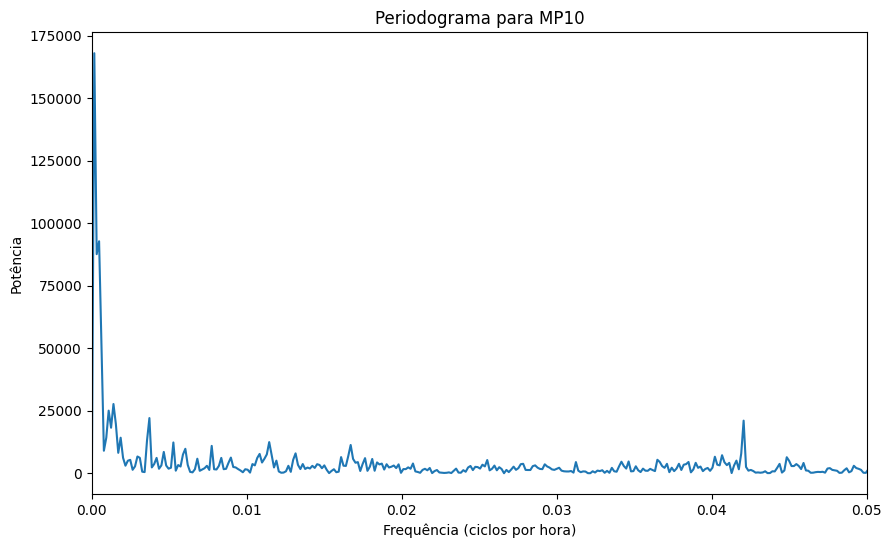

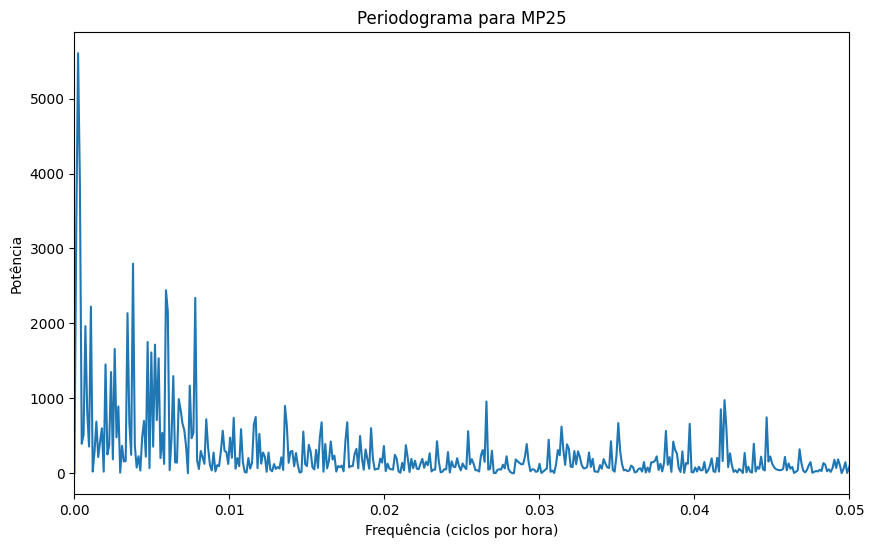

In [26]:
from scipy.signal import periodogram

for polu in poluentes:
    # Filtrando os dados para o poluente atual e removendo NaNs
    df_poluente = data_filtrada.loc[(data_filtrada['Poluente'] == polu), 'Valor'].dropna().copy()
    
    if df_poluente.mean() > 0:  # Ajustado para `df_poluente`
        
        # Calculando o periodograma
        frequencias, potencias = periodogram(df_poluente, fs=1)
        
        # Plotando o periodograma
        plt.figure(figsize=(10, 6))
        plt.plot(frequencias, potencias)
        plt.xlabel('Frequência (ciclos por hora)')
        plt.ylabel('Potência')
        title = f'Periodograma para {polu}'
        plt.title(title)
        plt.xlim(0, 0.05)  # Ajuste conforme necessário
        plt.savefig(os.path.dirname(cwd)+'\\ENS410064\\outputs_atv03\\'+estacao+'\\'+title+'.png')
        plt.show()